In [1]:
import pycpd
from functools import partial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pycpd import deformable_registration
import numpy as np
import time
import os,sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 233.33 ms


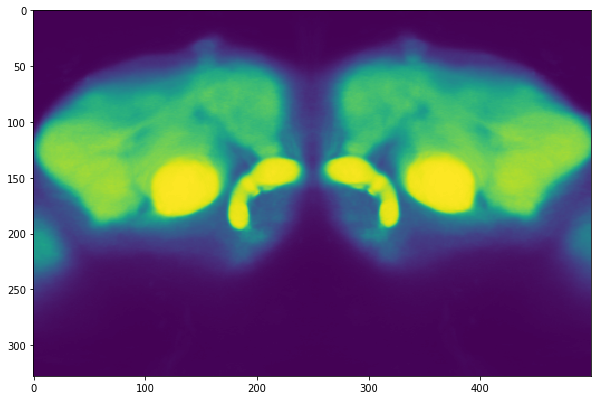

In [25]:
file = os.path.join(root_directory,'20191208_cpd','meanbrain20191208.nii')
meanbrain = bbb.load_numpy_brain(file)

meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain.numpy()[:,:,90].T)

# Load ROI


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 629.31 ms


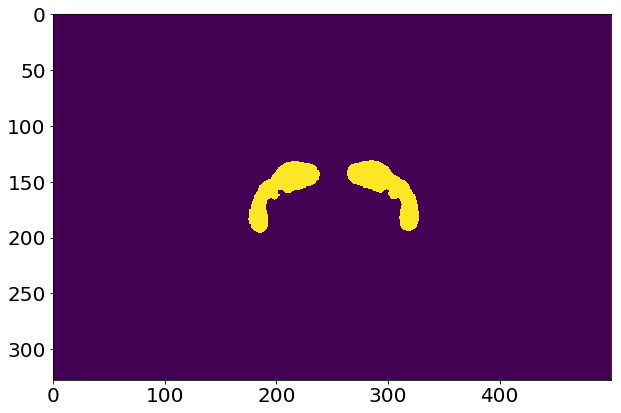

In [4]:
file = os.path.join(root_directory,'20191208_cpd','pb.nii.gz')
roi = bbb.load_numpy_brain(file)

roi = ants.from_numpy(roi)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
roi.set_spacing(bbb.get_resolution(anatomy_xml))

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(roi.numpy()[:,:,90].T)

# Load Template


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 373.77 ms


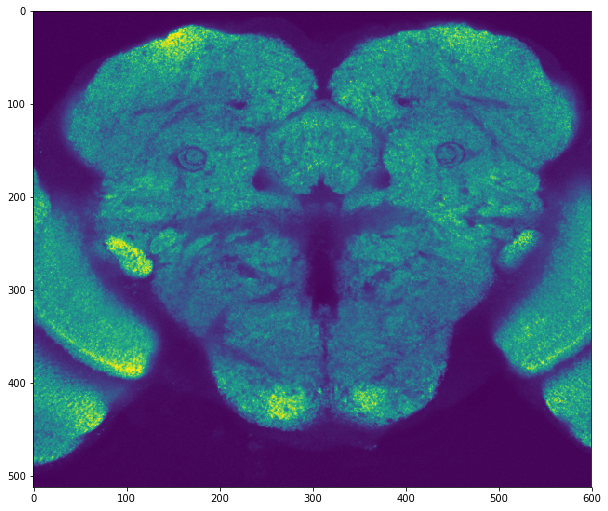

In [29]:
file = os.path.join(root_directory,'20191208_cpd','Template.nii')
template = bbb.load_numpy_brain(file)

template = ants.from_numpy(template)
template.set_spacing((0.622, 0.622, 0.622))

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(template.numpy()[:,:,90].T)

# Load Template ROIs


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 657.08 ms


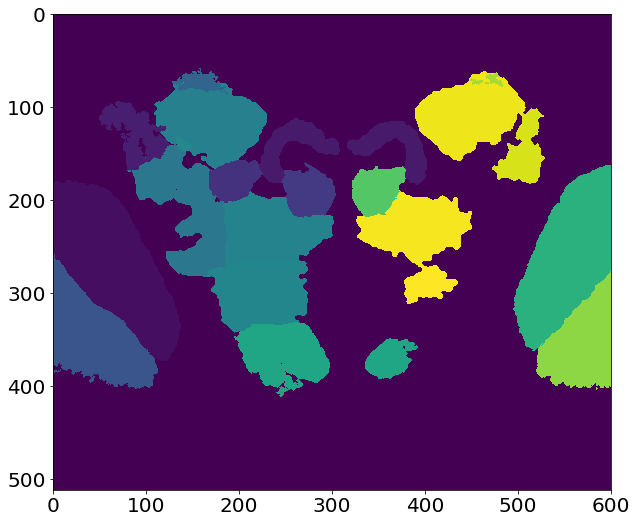

In [5]:
file = os.path.join(root_directory,'20191208_cpd','Template_ROIs.nii')
template_rois = bbb.load_numpy_brain(file)

template_rois = ants.from_numpy(template_rois)
template_rois.set_spacing((0.622, 0.622, 0.622))

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(template_rois.numpy()[:,:,40].T)

# Extract points from meanbrain_roi

In [6]:
X = np.asarray(np.where(roi.numpy()==1)).T
print(np.shape(X))

(55251, 3)


In [7]:
points_slave_1 = np.where(template_rois.numpy()==15)
points_slave_2 = np.where(template_rois.numpy()==62)
print(np.shape(points_slave_1))
print(np.shape(points_slave_2))

(3, 54648)
(3, 44024)


In [8]:
Y = np.asarray(np.hstack((points_slave_1,points_slave_2))).T
print(np.shape(Y))

(98672, 3)


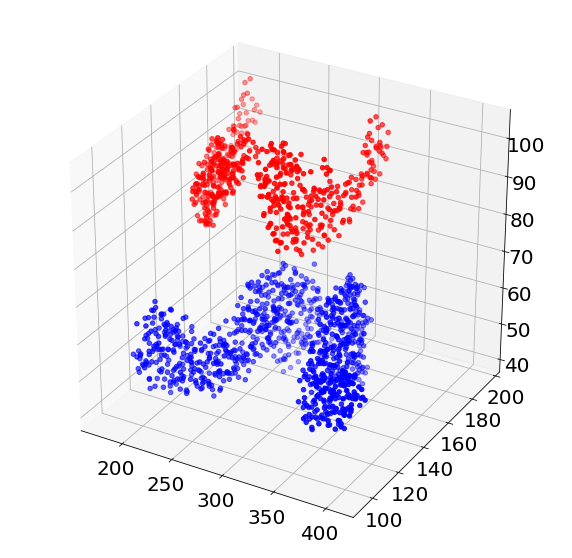

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[::100,0],  X[::100,1], X[::100,2], color='red', label='Target')
ax.scatter(Y[::100,0],  Y[::100,1], Y[::100,2], color='blue', label='Source')
ax.view_init(30, 300)

#### Start with source points (Y), and target points (X). CPD will create transformed source points (YT)

#### The points must be in shape: Each point is a row, colums are x,y,z values.

In [10]:
def visualize(iteration, error, X, Y, ax):
    plt.cla()
    ax.scatter(X[:,0],  X[:,1], X[:,2], color='red', label='Target')
    ax.scatter(Y[:,0],  Y[:,1], Y[:,2], color='blue', label='Source')
    ax.text2D(0.87, 0.92, 'Iteration: {:d}\nError: {:06.4f}'.format(iteration, error), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize='x-large')
    ax.legend(loc='upper left', fontsize='x-large')
    plt.draw()
    plt.pause(0.001)

def main():
    root_dir = '/home/users/brezovec/projects/pycpd'
    fish_target = np.loadtxt(os.path.join(root_dir,'data/fish_target.txt'))
    X1 = np.zeros((fish_target.shape[0], fish_target.shape[1] + 1))
    X1[:,:-1] = fish_target
    X2 = np.ones((fish_target.shape[0], fish_target.shape[1] + 1))
    X2[:,:-1] = fish_target
    X = np.vstack((X1, X2))

    fish_source = np.loadtxt(os.path.join(root_dir,'data/fish_source.txt'))
    Y1 = np.zeros((fish_source.shape[0], fish_source.shape[1] + 1))
    Y1[:,:-1] = fish_source
    Y2 = np.ones((fish_source.shape[0], fish_source.shape[1] + 1))
    Y2[:,:-1] = fish_source
    Y = np.vstack((Y1, Y2))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    callback = partial(visualize, ax=ax)

    reg = deformable_registration(**{ 'X': X, 'Y': Y })
    reg.register(callback)
    plt.show()

0.08795928955078125


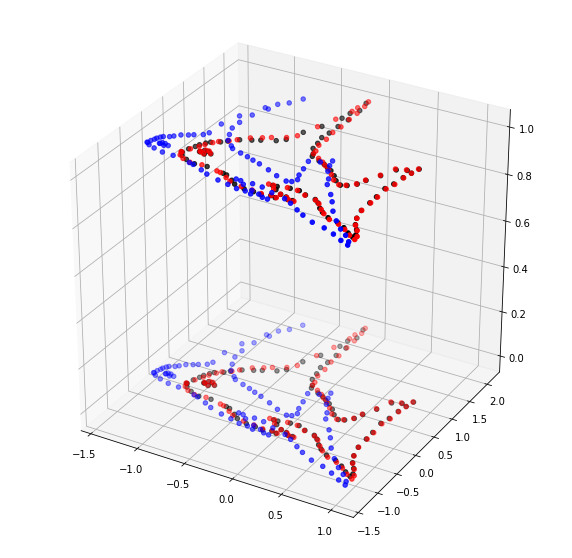

In [163]:
root_dir = '/home/users/brezovec/projects/pycpd'
fish_target = np.loadtxt(os.path.join(root_dir,'data/fish_target.txt'))
X1 = np.zeros((fish_target.shape[0], fish_target.shape[1] + 1))
X1[:,:-1] = fish_target
X2 = np.ones((fish_target.shape[0], fish_target.shape[1] + 1))
X2[:,:-1] = fish_target
X = np.vstack((X1, X2))

fish_source = np.loadtxt(os.path.join(root_dir,'data/fish_source.txt'))
Y1 = np.zeros((fish_source.shape[0], fish_source.shape[1] + 1))
Y1[:,:-1] = fish_source
Y2 = np.ones((fish_source.shape[0], fish_source.shape[1] + 1))
Y2[:,:-1] = fish_source
Y = np.vstack((Y1, Y2))

t0 = time.time()
reg = deformable_registration(**{ 'X': X, 'Y': Y })
reg.register()
print(time.time()-t0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],  X[:,1], X[:,2], color='red', label='Target')
ax.scatter(Y[:,0],  Y[:,1], Y[:,2], color='blue', label='Source')
ax.scatter(reg.TY[:,0],  reg.TY[:,1], reg.TY[:,2], color='k', label='Warped')
plt.show()

8.05657696723938


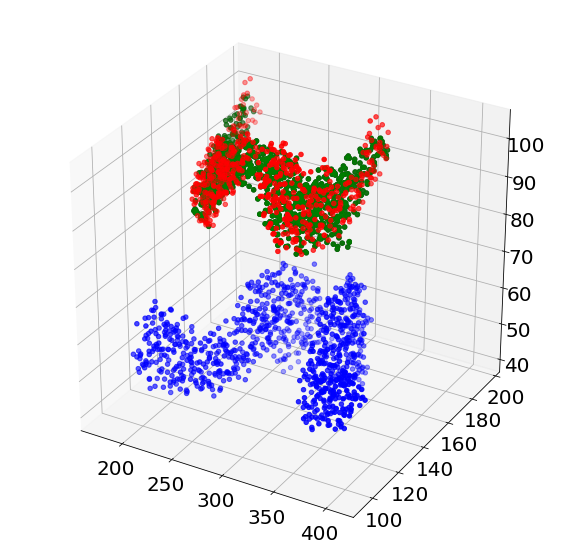

In [21]:
X = np.asarray(np.where(roi.numpy()==1)).T
points_slave_1 = np.where(template_rois.numpy()==15)
points_slave_2 = np.where(template_rois.numpy()==62)
Y = np.asarray(np.hstack((points_slave_1,points_slave_2))).T
X = X[::100,:]
Y = Y[::100,:]

t0 = time.time()
reg = deformable_registration(**{ 'X': X, 'Y': Y },
                              tolerance=.001,
                              alpha=0.01,
                              beta=2000)
reg.register()
print(time.time()-t0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],  X[:,1], X[:,2], color='red', label='Target')
ax.scatter(Y[:,0],  Y[:,1], Y[:,2], color='blue', label='Source')
ax.scatter(reg.TY[:,0],  reg.TY[:,1], reg.TY[:,2], color='k', label='Warped')
ax.scatter(test2[:,0],  test2[:,1], test2[:,2], color='green', label='Warped')
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],  X[:,1], X[:,2], color='red', label='Target')
ax.scatter(Y[:,0],  Y[:,1], Y[:,2], color='blue', label='Source')
ax.scatter(reg.TY[:,0],  reg.TY[:,1], reg.TY[:,2], color='k', label='Warped')
ax.scatter(test2[:,0],  test2[:,1], test2[:,2], color='green', label='Warped')
plt.show()

In [30]:
reg.P1.shape

(987,)

In [37]:
A = np.dot(np.diag(reg.P1), reg.G) + reg.alpha * reg.sigma2 * np.eye(reg.M)
B = np.dot(reg.P[:-1], reg.X) - np.dot(np.diag(reg.P1[:-1]), reg.Y[:-1,:])
W_temp = np.linalg.solve(A, B)

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 986 is different from 987)

In [24]:
W_temp.shape

(987, 3)

In [26]:
reg.Y[:-1,:].shape

(986, 3)

In [28]:
np.dot(np.diag(reg.P1), reg.Y[:-1,:])

ValueError: shapes (987,987) and (986,3) not aligned: 987 (dim 1) != 986 (dim 0)

In [19]:
test2 = Y + test

In [22]:
reg.W

array([[ -4.62132485,   4.99725485,  -6.06079112],
       [-20.73924383,  14.59245071,   3.75154232],
       [-11.0356312 ,   5.71347481,   3.3674779 ],
       ...,
       [ -9.39291104,  -0.44383142,  -4.59022643],
       [-12.85253417,   2.94399085,   4.44844796],
       [-12.72325289,   1.06726425,   5.44625902]])

In [20]:
test2.shape

(987, 3)

In [17]:
X.shape

(553, 3)

In [18]:
Y.shape

(987, 3)

In [12]:
reg.W.shape

(987, 3)

In [13]:
reg.G.shape

(987, 987)

In [14]:
test = np.dot(reg.G, reg.W)

In [15]:
test.shape

(987, 3)

In [221]:
test = np.array([[197,  97,  57],
       [198, 100,  57],
       [199, 100,  55],
       ...,
       [407, 106,  62],
       [408, 106,  60],
       [409, 107,  59]])

In [223]:
test = np.array([[100,100,100],[20,20,20]])

In [224]:
test.shape

(2, 3)

In [226]:
test2 = np.dot(reg.G,reg.W)

In [227]:
test2.shape

(987, 3)

In [229]:
test2

array([[-19.22196701,  83.53579475,  31.85253367],
       [-18.68400934,  84.29581076,  32.91358577],
       [-19.42765108,  82.80079565,  33.11248202],
       ...,
       [-81.66498426,  80.70236225,  33.89995459],
       [-81.55521263,  80.40432722,  34.06136092],
       [-81.43000353,  80.36367413,  34.26986036]])

In [225]:
#reg = deformable_registration()
out = reg.transform_point_cloud(Y=test)

ValueError: operands could not be broadcast together with shapes (2,3) (987,3) 

In [217]:
out

array([[ 80.77803299, 183.53579475, 131.85253367],
       [ 81.31599066, 184.29581076, 132.91358577],
       [ 80.57234892, 182.80079565, 133.11248202],
       ...,
       [ 18.33501574, 180.70236225, 133.89995459],
       [ 18.44478737, 180.40432722, 134.06136092],
       [ 18.56999647, 180.36367413, 134.26986036]])

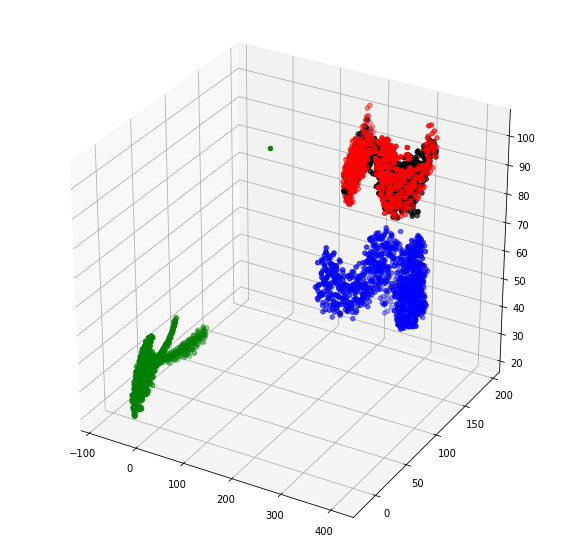

In [228]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],  X[:,1], X[:,2], color='red', label='Target')
ax.scatter(Y[:,0],  Y[:,1], Y[:,2], color='blue', label='Source')
ax.scatter(reg.TY[:,0],  reg.TY[:,1], reg.TY[:,2], color='k', label='Warped')
ax.scatter(100, 100, 100, color='green')
ax.scatter(test2[:,0],  test2[:,1], test2[:,2], color='green', label='Warped')
plt.show()

In [203]:
reg.G.shape

(987, 987)

In [204]:
reg.W.shape

(987, 3)

In [136]:
dir(reg)

['D',
 'G',
 'M',
 'N',
 'Np',
 'P',
 'P1',
 'Pt1',
 'W',
 'X',
 'Y',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alpha',
 'beta',
 'err',
 'expectation',
 'get_registration_parameters',
 'iterate',
 'iteration',
 'max_iterations',
 'maximization',
 'register',
 'sigma2',
 'tolerance',
 'transform_point_cloud',
 'update_transform',
 'update_variance',
 'w']

In [47]:
reg.get_registration_parameters()

(array([[1.        , 0.99973065, 0.99939384, ..., 0.77607083, 0.55134041,
         0.50094643],
        [0.99973065, 1.        , 0.99974683, ..., 0.77485162, 0.54866855,
         0.49857889],
        [0.99939384, 0.99974683, 1.        , ..., 0.77336398, 0.55800958,
         0.5083419 ],
        ...,
        [0.77607083, 0.77485162, 0.77336398, ..., 1.        , 0.67837485,
         0.61190286],
        [0.55134041, 0.54866855, 0.55800958, ..., 0.67837485, 1.        ,
         0.99371271],
        [0.50094643, 0.49857889, 0.5083419 , ..., 0.61190286, 0.99371271,
         1.        ]]),
 array([[ 4.10463974e+00,  2.90160289e+00,  1.88763943e-16],
        [ 5.31044080e+00, -4.06297084e+00, -1.04099219e-16],
        [-1.45114362e+00, -3.31234353e+00,  3.70103366e-17],
        [-4.50749034e+00,  1.70191042e+00,  2.17548468e-16],
        [-1.72473803e+00,  4.91047247e+00,  2.67028406e-16],
        [ 4.98499479e+00,  2.85046781e+00,  1.61767159e-16],
        [ 6.45756759e-01, -1.74898237e+00, 

In [6]:
dir(reg)

['D',
 'G',
 'M',
 'N',
 'Np',
 'P',
 'P1',
 'Pt1',
 'TY',
 'W',
 'X',
 'Y',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'alpha',
 'beta',
 'err',
 'expectation',
 'get_registration_parameters',
 'iterate',
 'iteration',
 'max_iterations',
 'maximization',
 'q',
 'register',
 'sigma2',
 'tolerance',
 'transform_point_cloud',
 'update_transform',
 'update_variance',
 'w']